# Filtration
Find suitable filtration starting point to use when fitting

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets

from commonmethods.utility_methods import read_data, get_bin_files_in_dir
from common_classes import Filtrator, Fitter, Parameters, Measurement
import os

plt.style.use('ggplot')

In [21]:
input_dir = r'C:\Users\ru\Downloads\good_2\LaBFO_05__1'
files_dir = os.path.join(input_dir, 'fourier_amp_ph')
files = get_bin_files_in_dir(
    files_dir
)
parameters = Parameters.read_from_file(os.path.join(input_dir, 'paramiters.txt'))

fitter = Fitter(
    parameters
)

In [22]:
len(files)

654

In [23]:
data = Measurement.read_from_file(files[600])
filtrator = Filtrator(0, parameters.bins_number)

<IPython.core.display.Javascript object>


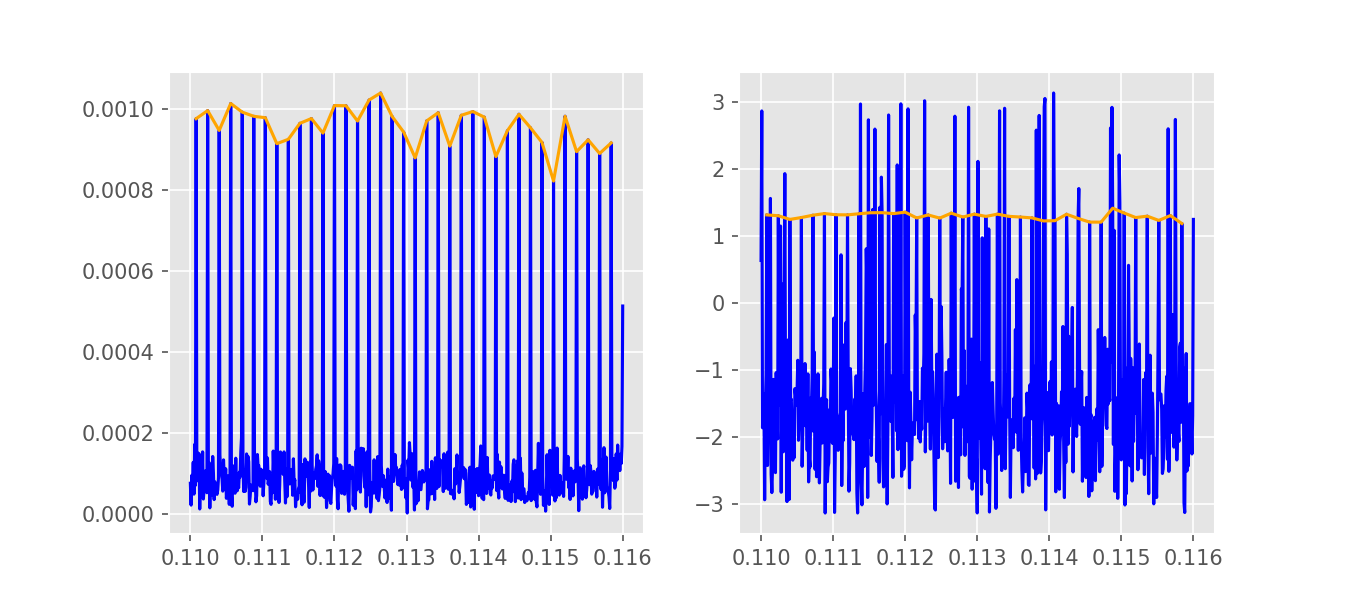

A Jupyter Widget

<function __main__._replot_with_different_filtration>

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))
filtered = filtrator.filter_measurement(data)
ax[0].plot(data.freq, data.amp, color='blue')
ax[0].plot(filtered.freq, filtered.amp, color='orange')
ax[1].plot(data.freq, data.phase, color='blue')
ax[1].plot(filtered.freq, filtered.phase, color='orange')

def _replot_with_different_filtration(delta):
    filtered = filtrator.filter_measurement(data, delta)
    ax[0].lines.pop(1)
    ax[0].plot(filtered.freq, filtered.amp, color='orange')
    ax[1].lines.pop(1)
    ax[1].plot(filtered.freq, filtered.phase, color='orange')

widgets.interact(_replot_with_different_filtration,
        delta=widgets.IntSlider(value=0, min=0, max=parameters.bins_number, step=1))